# SHAPを使ったサンプル
- 参照： https://github.com/slundberg/shap

In [1]:
import xgboost
display(xgboost.__version__)
import shap
display(xgboost.__version__)

'0.90'

/Users/m.suzuki/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


'0.90'

In [2]:
# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [3]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

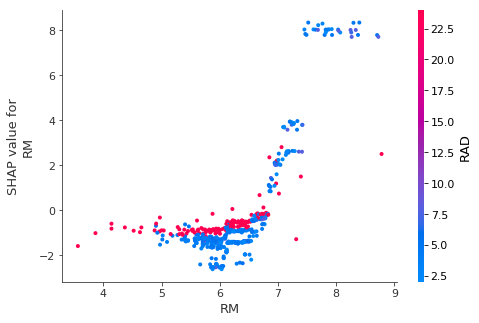

In [4]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

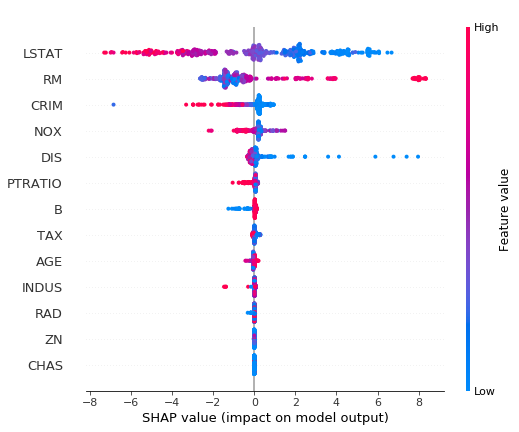

In [5]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

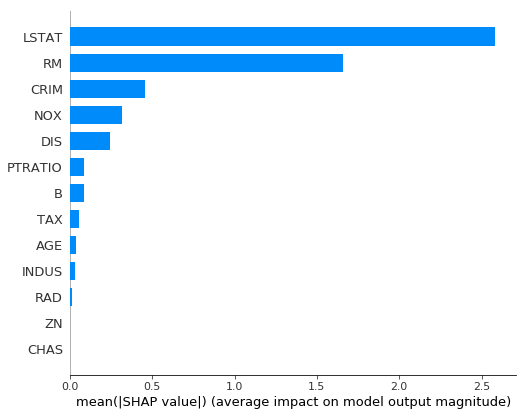

In [6]:
shap.summary_plot(shap_values, X, plot_type="bar")